In [ ]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/TON_IoT/Train_Test_Network.csv")

In [ ]:
train_df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
train_df.dns_RD.value_counts()

-    365158
F     63106
T     32779
Name: dns_RD, dtype: int64

In [ ]:
train_df.proto.value_counts()

tcp     282076
udp     173087
icmp      5880
Name: proto, dtype: int64

In [ ]:
train_normal  =train_df[train_df['type'].isin(['normal'])]
train_df_rem = train_df[~train_df['type'].isin(['normal'])] #minority classes sub set
train_df_norm = pd.concat([train_normal[:50000]], axis=0)
train_mod = pd.concat([train_df_norm, train_df_rem], axis=0)
train_mod.shape

(211043, 45)

In [ ]:
ls_strings =[]
for column in list(train_mod.columns):
     if train_mod[column].dtypes == 'O':
            ls_strings.append(column)

In [ ]:
ls_strings.remove('type')

In [ ]:
i=0
while i<len(ls_strings):
      j=0
      uniq = train_mod[ls_strings[i]].unique()
      while j<len(uniq):
                train_mod = train_mod.replace({ls_strings[i] : uniq[j]}, j)
                j+=1
      i+=1

In [ ]:
#Label encoder for class type, converting the string to numeric values as part of data preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_mod.type = le.fit_transform(train_mod.type)
train_mod.type.unique()

array([5, 8, 2, 3, 1, 6, 9, 7, 0, 4])

In [ ]:
train_mod.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,0,1883,0,52976,0,0,80549.530260,1762852,41933215,0,0,252181,14911156,2,236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,1554198358,1,47260,1,15600,1,0,0.000000,0,0,1,0,1,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5
2,1554198359,2,1880,0,51782,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,1554198359,2,34296,0,10502,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5
4,1554198362,2,46608,2,53,1,1,0.000549,0,298,2,0,0,0,2,354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5


In [ ]:
train_mod_sample = train_mod

In [ ]:
train_mod_sample =  train_mod_sample.drop(columns = ['type'])

In [ ]:
for i in list(train_mod_sample):
          train_mod_sample[i] = train_mod_sample[i].astype(float)

In [ ]:
y_type = train_mod['type']

In [ ]:
train_mod_sample.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label
0,1.554198e+09,0.0,1883.0,0.0,52976.0,0.0,0.0,80549.530260,1762852.0,41933215.0,0.0,0.0,252181.0,14911156.0,2.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.554198e+09,1.0,47260.0,1.0,15600.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.554198e+09,2.0,1880.0,0.0,51782.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.554198e+09,2.0,34296.0,0.0,10502.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.554198e+09,2.0,46608.0,2.0,53.0,1.0,1.0,0.000549,0.0,298.0,2.0,0.0,0.0,0.0,2.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
train_mod_sample['type'] = y_type

In [ ]:
train_mod_sample.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1.554198e+09,0.0,1883.0,0.0,52976.0,0.0,0.0,80549.530260,1762852.0,41933215.0,0.0,0.0,252181.0,14911156.0,2.0,236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,1.554198e+09,1.0,47260.0,1.0,15600.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
2,1.554198e+09,2.0,1880.0,0.0,51782.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,1.554198e+09,2.0,34296.0,0.0,10502.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
4,1.554198e+09,2.0,46608.0,2.0,53.0,1.0,1.0,0.000549,0.0,298.0,2.0,0.0,0.0,0.0,2.0,354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5


In [ ]:
train_mod = train_mod_sample

In [ ]:
train_df.ssl_subject.value_counts()

-                                                                                           461034
CN=*.wns.windows.com                                                                             4
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                     2
CN=*.events.data.microsoft.com;OU=Microsoft;O=Microsoft Corporation;L=Redmond;ST=WA;C=US         1
CN=settings-win.data.microsoft.com;OU=WSE;O=Microsoft;L=Redmond;ST=WA;C=US                       1
CN=sls.update.microsoft.com;OU=DSP;O=Microsoft;L=Redmond;ST=WA;C=US                              1
Name: ssl_subject, dtype: int64

In [ ]:
train_df.ssl_issuer.value_counts()

-                                                                                                461034
CN=Microsoft IT TLS CA 5;OU=Microsoft IT;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         4
CN=Microsoft Secure Server CA 2011;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US               2
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                          2
CN=Microsoft Update Secure Server CA 2.1;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         1
Name: ssl_issuer, dtype: int64

In [ ]:
train_df.http_version.value_counts()

-      460801
1.1       242
Name: http_version, dtype: int64

In [ ]:
train_df.weird_notice.value_counts()

-    459749
F      1294
Name: weird_notice, dtype: int64

In [ ]:
train_mod = train_mod.drop(['ssl_subject','ssl_issuer','http_version'], axis = 1)



In [ ]:
train_mod = train_mod.drop(['src_ip'], axis = 1)
train_mod = train_mod.drop(['dst_ip'], axis = 1)
train_mod = train_mod.drop(['ts','dns_query'], axis = 1)

In [ ]:
train_mod= train_mod.replace({'http_trans_depth':'-'}, 0)
train_mod= train_mod.replace({'weird_addl':'-'}, 0)
train_mod['weird_addl'] = train_mod['weird_addl'].astype('int64')
train_mod['http_trans_depth'] = train_mod['http_trans_depth'].astype('int64')

Features having more than 2 unique values

In [ ]:
High_var_cols = []
less_var_cols = []   
unique = []

for col in train_mod:
    if len(train_mod[col].unique())>2:
      #print("Unique Values in Train & Eval Feature % s" % col,max(train[col].unique()),max(eval[col].unique()))
      unique.append(len(train_mod[col].unique()))
      High_var_cols.append(col) 
    else:
      less_var_cols.append(col)  
      unique.append(len(train_mod[col].unique()))

In [ ]:
print('Low', less_var_cols)
print('High',High_var_cols)

Low ['http_orig_mime_types', 'weird_notice', 'label']
High ['src_port', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'http_trans_depth', 'http_method', 'http_uri', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'type']


In [ ]:
train_mod.shape

(211043, 38)

In [ ]:
unique = pd.DataFrame(unique,  columns=['Numerical Features'])


In [ ]:
unique.shape

(38, 1)

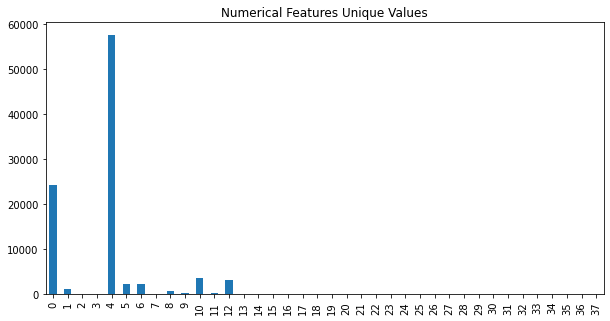

In [ ]:
plt.figure(figsize=(10, 5))
unique['Numerical Features'].plot.bar()
plt.title('Numerical Features Unique Values')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

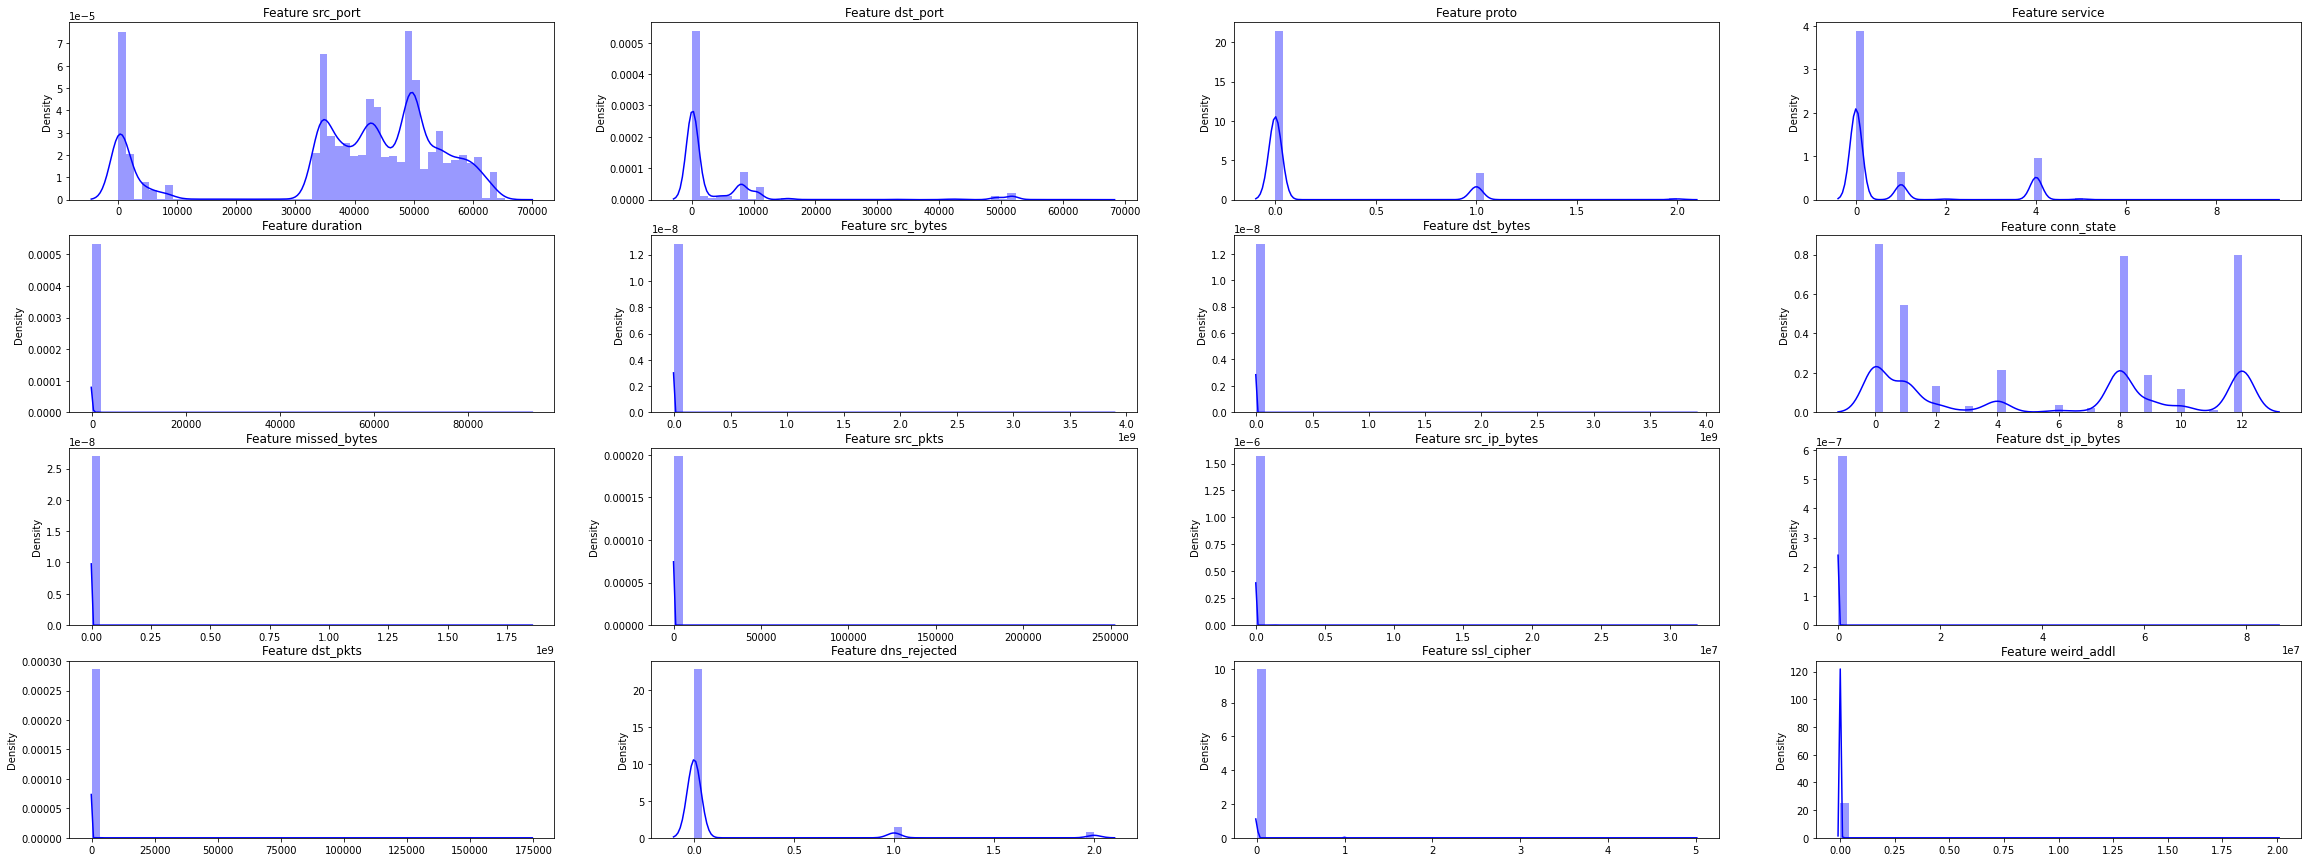

In [ ]:
#Closer lookk into high variance features 
#'src_port', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes'
import seaborn as sns
plt.figure(figsize=(40, 15))  
plt.subplot(4,4,1)
plt.title('Feature src_port')
sns.distplot(x = train_mod['src_port'], color='b')
plt.subplot(4,4,2)
plt.title('Feature dst_port')
sns.distplot(x =train_mod['dst_port'], color='b')
plt.subplot(4,4,3)
plt.title('Feature proto')
sns.distplot(x = train_mod['proto'], color='b')
plt.subplot(4,4,4)
plt.title('Feature service')
sns.distplot(x = train_mod['service'], color='b')
plt.subplot(4,4,5)
plt.title('Feature duration')
sns.distplot(x = train_mod['duration'], color='b')
plt.subplot(4,4,6)
plt.title('Feature src_bytes')
sns.distplot(x = train_mod['src_bytes'], color='b')
plt.subplot(4,4,7)
plt.title('Feature dst_bytes')
sns.distplot(x = train_mod['dst_bytes'], color='b')
plt.subplot(4,4,8)
plt.title('Feature conn_state')
sns.distplot(x = train_mod['conn_state'], color='b')
plt.subplot(4,4,9)
plt.title('Feature missed_bytes')
sns.distplot(x = train_mod['missed_bytes'], color='b')
plt.subplot(4,4,10)
plt.title('Feature src_pkts')
sns.distplot(x = train_mod['src_pkts'], color='b')
plt.subplot(4,4,11)
plt.title('Feature src_ip_bytes')
sns.distplot(x = train_mod['src_ip_bytes'], color='b')
plt.subplot(4,4,12)
plt.title('Feature dst_ip_bytes')
sns.distplot(x = train_mod['dst_ip_bytes'], color='b')
plt.subplot(4,4,13)
plt.title('Feature dst_pkts')
sns.distplot(x = train_mod['dst_pkts'], color='b')
plt.subplot(4,4,14)
plt.title('Feature dns_rejected')
sns.distplot(x = train_mod['dns_rejected'], color='b')
plt.subplot(4,4,15)
plt.title('Feature ssl_cipher')
sns.distplot(x = train_mod['ssl_cipher'], color='b')
plt.subplot(4,4,16)
plt.title('Feature weird_addl')
sns.distplot(x = train_mod['weird_addl'], color='b')

plt.show() 

BiVariate Analysis

[Text(0, 0, '5'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '0'),
 Text(0, 0, '4')]

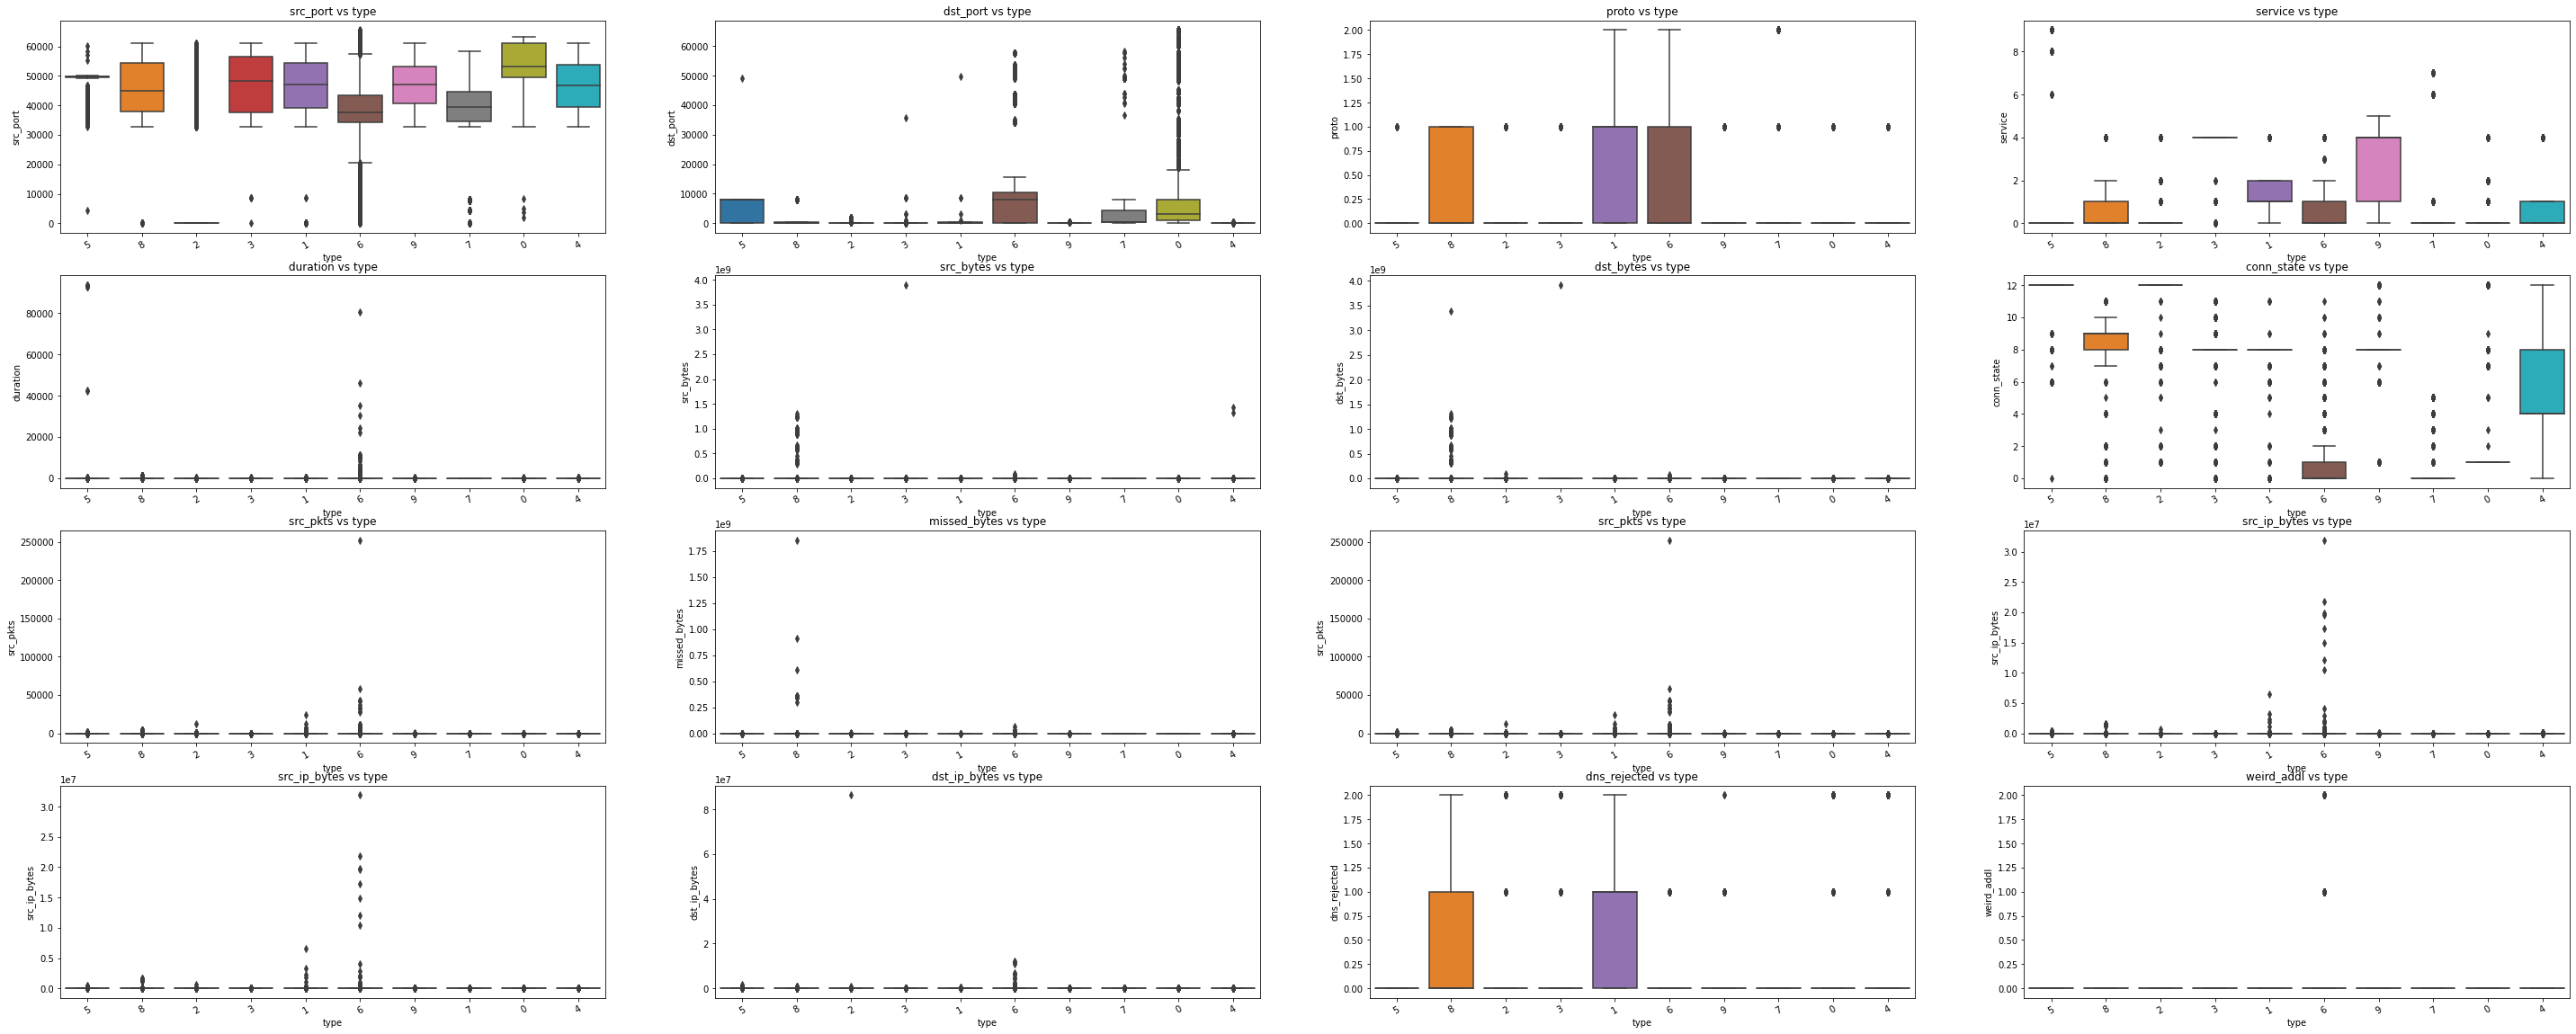

In [ ]:
plt.figure(figsize=(50, 20))  #3,4,15,17,19,22,34,39
plt.subplot(4,4,1)
plt.title('src_port vs type')
sns.boxplot(y = train_mod['src_port'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,2)
plt.title('dst_port vs type')
sns.boxplot(y = train_mod['dst_port'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,3)
plt.title('proto vs type')
sns.boxplot(y = train_mod['proto'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,4)
plt.title('service vs type')
sns.boxplot(y = train_mod['service'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,5)
plt.title('duration vs type')
sns.boxplot(y = train_mod['duration'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,6)
plt.title('src_bytes vs type')
sns.boxplot(y = train_mod['src_bytes'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,7)
plt.title('dst_bytes vs type')
sns.boxplot(y = train_mod['dst_bytes'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,8)
plt.title('conn_state vs type')
sns.boxplot(y = train_mod['conn_state'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,9)
plt.title('src_pkts vs type')
sns.boxplot(y = train_mod['src_pkts'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,10)
plt.title('missed_bytes vs type')
sns.boxplot(y = train_mod['missed_bytes'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,11)
plt.title('src_pkts vs type')
sns.boxplot(y = train_mod['src_pkts'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,12)
plt.title('src_ip_bytes vs type')
sns.boxplot(y = train_mod['src_ip_bytes'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,13)
plt.title('src_ip_bytes vs type')
sns.boxplot(y = train_mod['src_ip_bytes'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,14)
plt.title('dst_ip_bytes vs type')
sns.boxplot(y = train_mod['dst_ip_bytes'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,15)
plt.title('dns_rejected vs type')
sns.boxplot(y = train_mod['dns_rejected'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())

plt.subplot(4,4,16)
plt.title('weird_addl vs type')
sns.boxplot(y = train_mod['weird_addl'], x = train_mod['type'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['type'].unique())



[Text(0, 0, '0.0'), Text(0, 0, '1.0')]

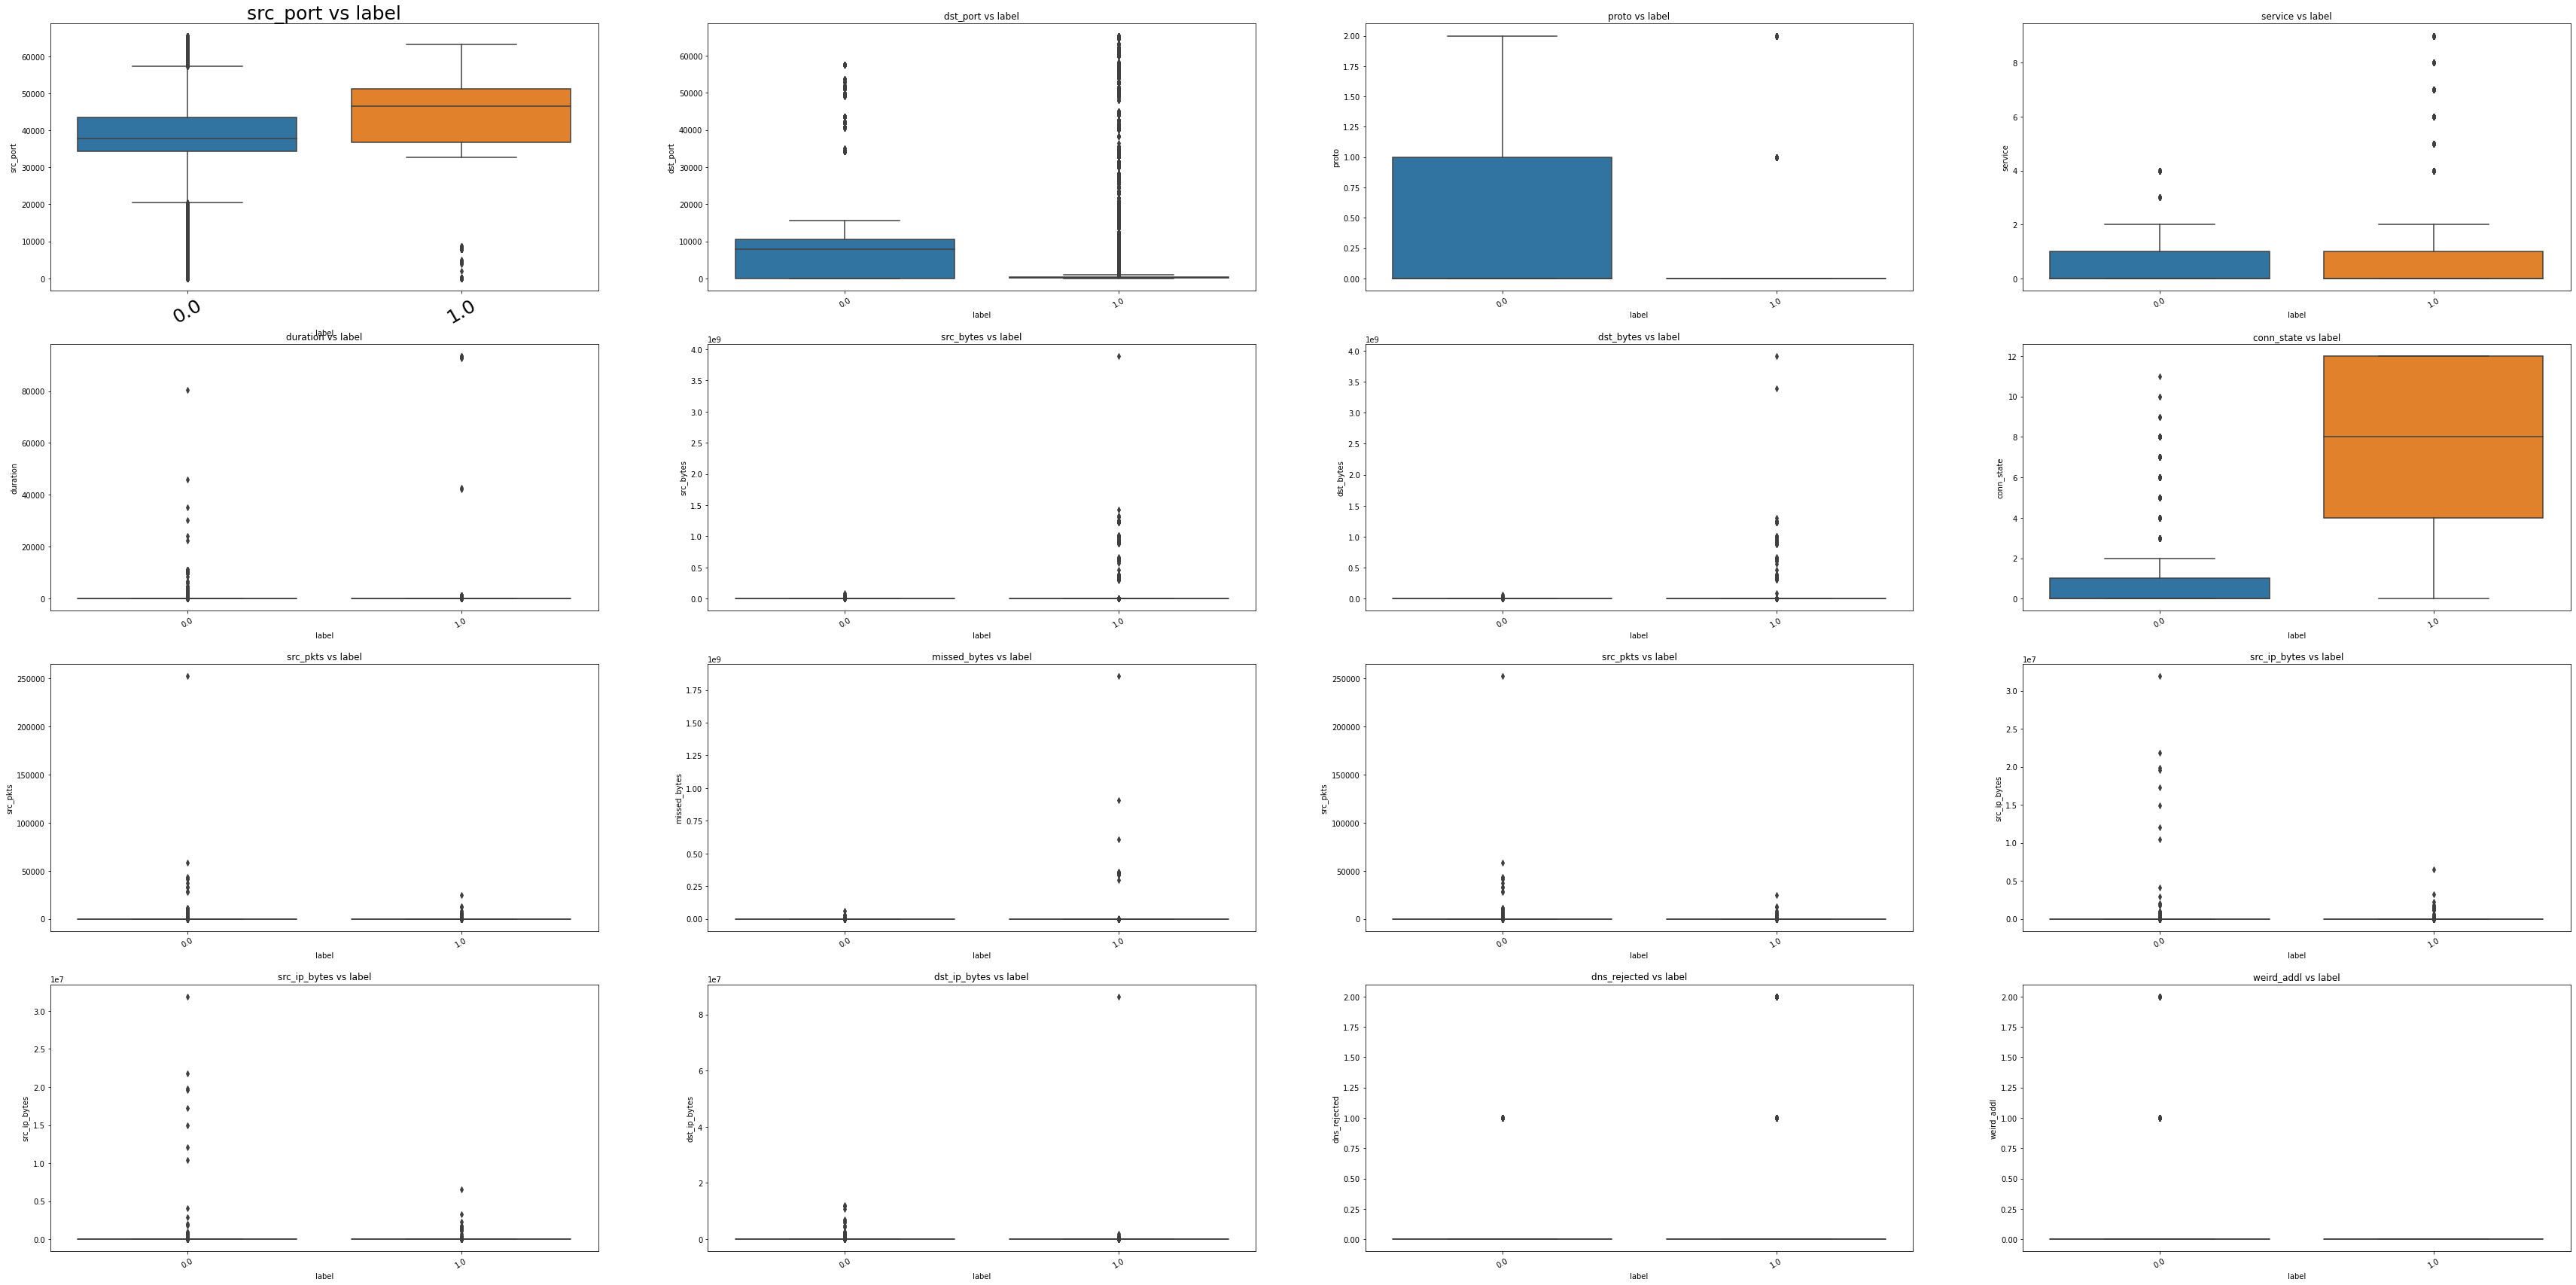

In [ ]:
plt.figure(figsize=(60, 30))  #3,4,15,17,19,22,34,39
plt.subplot(4,4,1)
plt.title('src_port vs label', fontsize=25)
sns.boxplot(y = train_mod['src_port'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique(), size = 25)

plt.subplot(4,4,2)
plt.title('dst_port vs label')
sns.boxplot(y = train_mod['dst_port'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,3)
plt.title('proto vs label')
sns.boxplot(y = train_mod['proto'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,4)
plt.title('service vs label')
sns.boxplot(y = train_mod['service'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,5)
plt.title('duration vs label')
sns.boxplot(y = train_mod['duration'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,6)
plt.title('src_bytes vs label')
sns.boxplot(y = train_mod['src_bytes'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,7)
plt.title('dst_bytes vs label')
sns.boxplot(y = train_mod['dst_bytes'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,8)
plt.title('conn_state vs label')
sns.boxplot(y = train_mod['conn_state'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,9)
plt.title('src_pkts vs label')
sns.boxplot(y = train_mod['src_pkts'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,10)
plt.title('missed_bytes vs label')
sns.boxplot(y = train_mod['missed_bytes'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,11)
plt.title('src_pkts vs label')
sns.boxplot(y = train_mod['src_pkts'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,12)
plt.title('src_ip_bytes vs label')
sns.boxplot(y = train_mod['src_ip_bytes'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,13)
plt.title('src_ip_bytes vs label')
sns.boxplot(y = train_mod['src_ip_bytes'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,14)
plt.title('dst_ip_bytes vs label')
sns.boxplot(y = train_mod['dst_ip_bytes'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,15)
plt.title('dns_rejected vs label')
sns.boxplot(y = train_mod['dns_rejected'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

plt.subplot(4,4,16)
plt.title('weird_addl vs label')
sns.boxplot(y = train_mod['weird_addl'], x = train_mod['label'], data = train_mod).set_xticklabels(rotation=30, labels=train_mod['label'].unique())

SMOTE - Over Sampling

In [ ]:
train_normal  =train_mod[train_mod['type'].isin(['0'])]
train_xss = train_mod[train_mod['type'].isin(['1'])]
train_scanning = train_mod[train_mod['type'].isin(['2'])]
train_ransomware = train_mod[train_mod['type'].isin(['3'])]
train_ddos = train_mod[train_mod['type'].isin(['4'])]
train_password = train_mod[train_mod['type'].isin(['5'])]
train_dos = train_mod[train_mod['type'].isin(['6'])]
train_backdoor = train_mod[train_mod['type'].isin(['7'])]
train_injection = train_mod[train_mod['type'].isin(['8'])]
train_mitm = train_mod[train_mod['type'].isin(['9'])]

In [ ]:
y = train_mod['type']
y_lbl = train_mod['label']
X = train_mod.drop(columns = ['type','label'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=5, n=50000 (10.000%)
Class=8, n=50000 (10.000%)
Class=2, n=50000 (10.000%)
Class=3, n=50000 (10.000%)
Class=1, n=50000 (10.000%)
Class=6, n=50000 (10.000%)
Class=9, n=50000 (10.000%)
Class=7, n=50000 (10.000%)
Class=0, n=50000 (10.000%)
Class=4, n=50000 (10.000%)


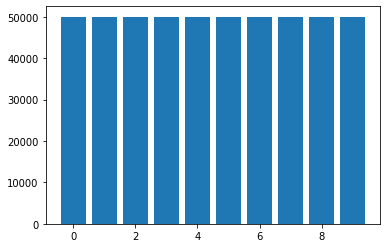

In [ ]:
import collections
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

n_class_sample=50000


strategy = { 0:n_class_sample,1:n_class_sample, 2:n_class_sample, 3:n_class_sample, 4:n_class_sample, 5:n_class_sample,
            6:n_class_sample, 7:n_class_sample, 8:n_class_sample, 9:n_class_sample, 
           }
           
oversample = SMOTE(sampling_strategy=strategy,k_neighbors=1)
X_train_smot, y_train_smot = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y_train_smot)
for k,v in counter.items():
	per = v / len(y_train_smot) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
np.random.seed(0)# split data into train and test/validation sets
#splitiing data for test and train for validation purpose
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_smot,y_train_smot, stratify=y_train_smot,test_size=(20/100),random_state=39)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_smot,y_train_smot, stratify=y_train_smot,test_size=(20/100),random_state=39)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_smot, y_train_smot, test_size = 0.2, stratify = y_train_smot,random_state=39,)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((400000, 36), (100000, 36), (400000,), (100000,))

In [ ]:
High_var_cols = High_var_cols.remove('type')

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
#list_features = list(X_train.columns)
X_train = qt.fit_transform(X_train)
X_valid = qt.transform(X_valid)


In [ ]:
X_test = qt.transform(X_test)

In [ ]:
X_test = pd.DataFrame(X_test,columns=X.columns) #converting numpy array to dataframes, will be useful for further processing
X_test.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_method,http_uri,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,-0.607767,-0.202098,-5.199338,1.286702,0.899018,1.471555,1.061884,0.082896,-5.199338,0.905189,1.266384,1.123415,1.137677,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
1,1.130352,-1.035790,1.428482,0.549616,-0.328223,0.383354,0.381619,0.082896,-5.199338,-0.437620,-0.048948,-0.046436,0.278315,1.579968,1.525529,2.225823,1.579968,5.199338,1.318946,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
2,-0.465190,0.615025,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.447305,-5.199338,-0.437620,1.446104,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
3,0.075594,-1.035790,1.428482,0.549616,0.568983,0.598435,0.705530,0.082896,-5.199338,0.344154,0.348150,0.530745,0.692715,1.579968,1.525529,-5.199338,1.579968,5.199338,5.199338,1.449682,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
4,0.557555,1.264066,-5.199338,-5.199338,-0.254986,-5.199338,-5.199338,5.199338,-5.199338,-0.437620,-0.468203,-0.046436,-0.186756,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338


In [ ]:
X_train = pd.DataFrame(X_train,columns=X.columns) #converting numpy array to dataframes, will be useful for further processing
X_train.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_method,http_uri,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,1.295215,-0.202098,-5.199338,-5.199338,0.031561,-5.199338,-5.199338,0.558392,-5.199338,0.344154,0.163824,-0.046436,0.207223,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
1,-0.268179,0.615025,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.447305,-5.199338,-0.437620,1.446104,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
2,-2.483413,-5.199338,5.199338,-5.199338,-0.493553,0.651824,-5.199338,-5.199338,-5.199338,0.344154,0.392492,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
3,-0.996249,0.423855,-5.199338,-5.199338,3.094651,-5.199338,1.689769,-5.199338,-5.199338,-5.199338,-5.199338,2.179128,1.011236,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
4,1.231529,-0.202098,-5.199338,-5.199338,0.855604,1.200226,1.061884,0.695908,2.427449,-0.437620,-0.116941,1.123415,1.137677,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338


In [ ]:
X_valid = pd.DataFrame(X_valid,columns=X.columns) #converting numpy array to dataframes, will be useful for further processing
X_valid.head()

,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,http_trans_depth,http_method,http_uri,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice
0,-0.607767,-0.202098,-5.199338,1.286702,0.899018,1.471555,1.061884,0.082896,-5.199338,0.905189,1.266384,1.123415,1.137677,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
1,1.130352,-1.035790,1.428482,0.549616,-0.328223,0.383354,0.381619,0.082896,-5.199338,-0.437620,-0.048948,-0.046436,0.278315,1.579968,1.525529,2.225823,1.579968,5.199338,1.318946,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
2,-0.465190,0.615025,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.447305,-5.199338,-0.437620,1.446104,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
3,0.075594,-1.035790,1.428482,0.549616,0.568983,0.598435,0.705530,0.082896,-5.199338,0.344154,0.348150,0.530745,0.692715,1.579968,1.525529,-5.199338,1.579968,5.199338,5.199338,1.449682,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338
4,0.557555,1.264066,-5.199338,-5.199338,-0.254986,-5.199338,-5.199338,5.199338,-5.199338,-0.437620,-0.468203,-0.046436,-0.186756,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.0,-5.199338,5.199338


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

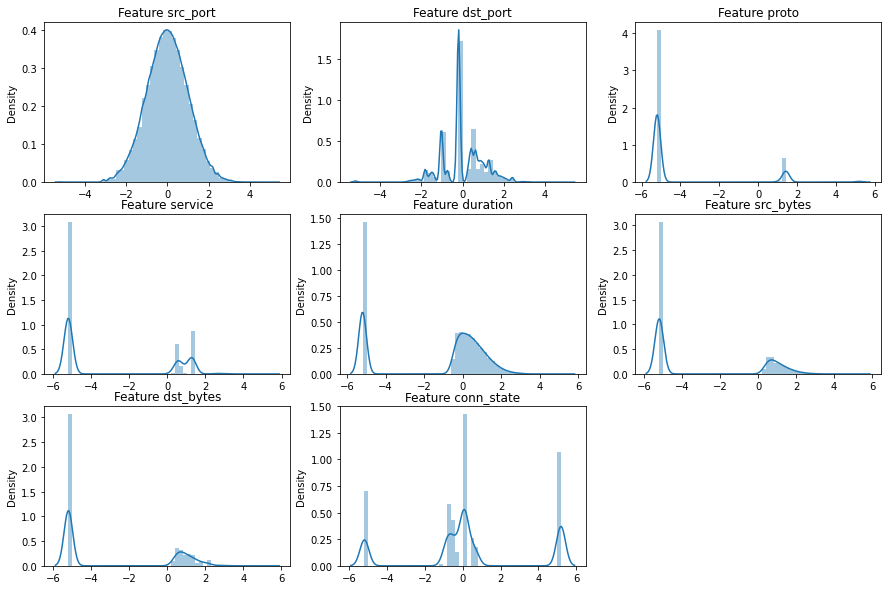

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))  
plt.subplot(3,3,1)
plt.title('Feature src_port')
sns.distplot(x = X_train['src_port'])
plt.subplot(3,3,2)
plt.title('Feature dst_port')
sns.distplot(x =X_train['dst_port'])
plt.subplot(3,3,3)
plt.title('Feature proto')
sns.distplot(x = X_train['proto'])
plt.subplot(3,3,4)
plt.title('Feature service')
sns.distplot(x = X_train['service'])
plt.subplot(3,3,5)
plt.title('Feature duration')
sns.distplot(x = X_train['duration'])
plt.subplot(3,3,6)
plt.title('Feature src_bytes')
sns.distplot(x = X_train['src_bytes'])
plt.subplot(3,3,7)
plt.title('Feature dst_bytes')
sns.distplot(x = X_train['dst_bytes'])
plt.subplot(3,3,8)
plt.title('Feature conn_state')
sns.distplot(x = X_train['conn_state'])
plt.show() 

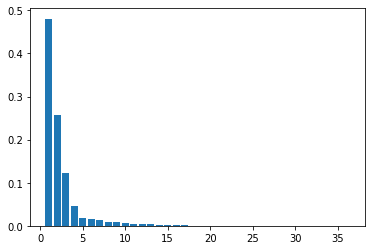

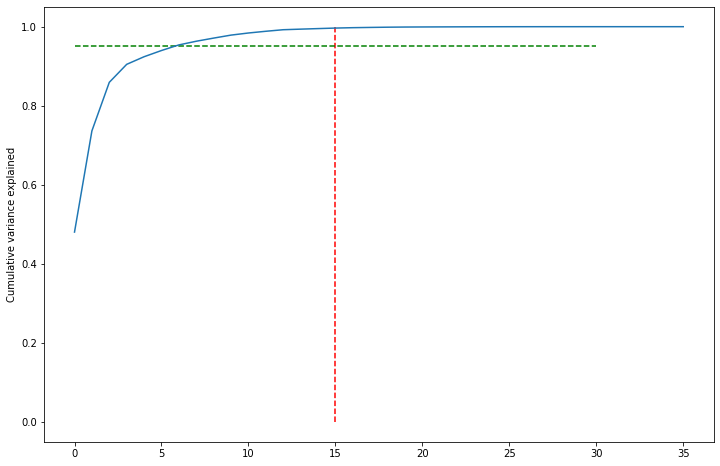

In [ ]:
#PCA for faster execution and less number of features to decrease complexity of knn
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30) # after observing variance ratio, keeping 30 components for training the model 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Balanced_accuracy = []
F1_score = []

# Will take some time
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(pca_final.fit_transform(X_train), y_train)
    pred_i = knn.predict(pca_final.transform(X_valid))
    Balanced_accuracy.append(metrics.balanced_accuracy_score(y_valid,pred_i)) 
    F1_score.append(metrics.f1_score(y_valid,pred_i, average='macro'))

Text(0, 0.5, 'Balanced Accuracy')

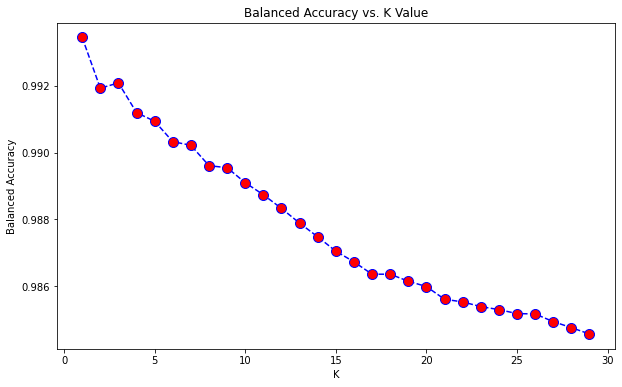

In [ ]:
plt.figure(figsize=(10,6))
plt.plot (range(1,30),Balanced_accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Balanced Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Balanced Accuracy')

Text(0, 0.5, 'F1 Score')

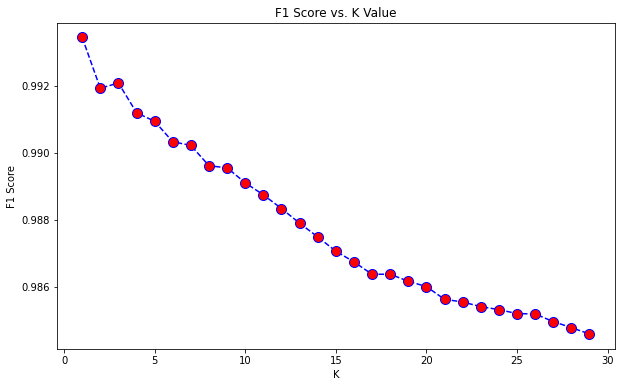

In [ ]:
plt.figure(figsize=(10,6))
plt.plot (range(1,30),F1_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')

In [ ]:
pred____ = pd.DataFrame()
pred = pd.DataFrame()
i=0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=20)

seed=42

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)  #Making 5 splits to avoid overfitting when predicting for unseen data

cv_score_knn_f =[]
cv_score_knn_b =[]

for train_index,test_index in kf.split(X_train,y_train):
    i+=1
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
  
    ytr,yvl = y_train[train_index],y_train[test_index]
     
    #model
    neigh.fit(pca_final.fit_transform(xtr),ytr)
    
    pred[i] = neigh.predict(pca_final.transform(X_valid))




    confusion_matrix(pred[i], y_test)
 

    print('Balanced Accuracy on validation set:', balanced_accuracy_score(y_valid,pred[i]))
    cv_score_knn_b.append(balanced_accuracy_score(y_valid,pred[i]))

    print('F1 Score on validation set:',f1_score(y_valid,pred[i],average='macro'))
    cv_score_knn_f.append(f1_score(y_valid,pred[i],average='macro'))   

    pred____[i] = neigh.predict(pca_final.transform(X_test)) #prediction on the eval dataset

6 of KFold 5
Balanced Accuracy on validation set: 0.9850100000000002
F1 Score on validation set: 0.9850256643381267
7 of KFold 5
Balanced Accuracy on validation set: 0.98521
F1 Score on validation set: 0.9852239269549619
8 of KFold 5
Balanced Accuracy on validation set: 0.9853500000000001
F1 Score on validation set: 0.9853638826840205
9 of KFold 5
Balanced Accuracy on validation set: 0.9849
F1 Score on validation set: 0.9849128230496376
10 of KFold 5
Balanced Accuracy on validation set: 0.98511
F1 Score on validation set: 0.9851242866991996


In [ ]:
pred

,1,2,3,4,5
0,3,3,3,3,3
1,1,1,1,1,1
2,7,7,7,7,7
3,4,4,4,4,4
4,0,0,0,0,0
...,...,...,...,...,...
99995,3,3,3,3,3
99996,2,2,2,2,2
99997,7,7,7,7,7
99998,2,2,2,2,2


In [ ]:
pred['Final_knn'] = pred.mode(axis=1).iloc[:, 0] 

In [ ]:
#Plot classfication report for knn
from sklearn.metrics import classification_report
print(classification_report(y_valid,pred['Final_knn'],  
        target_names=le.inverse_transform(neigh.classes_)))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00     10000
        ddos       0.98      0.95      0.97     10000
         dos       0.99      0.97      0.98     10000
   injection       0.97      0.95      0.96     10000
        mitm       0.94      1.00      0.97     10000
      normal       0.99      0.99      0.99     10000
    password       1.00      0.99      0.99     10000
  ransomware       0.99      1.00      1.00     10000
    scanning       0.99      0.99      0.99     10000
         xss       0.95      0.97      0.96     10000

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000

